<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Getting Data from HTML Tables with `pd.read_html()` - Solution

_Author: Jeff Hale (DC)_

---

## Learning Objectives

After this lesson students will be able to:
- Scrape tables from websites with `pd.read_html()`
- Read tables in pandas DataFrames
- Know when to try `pd.read_html()`


###  Import pandas under the usual alias

In [1]:
import pandas as pd

#### %autoreload

The following Jupyter magic commands will autoreload packages so you don't have to restart your Jupyter server if you install a new package after you launch the server. 

In [2]:
# autoreload packages after install 
%load_ext autoreload
%autoreload 2

## Let's see a faster way to scrape the basketball reference example Riley used

Let's look at the function signature for `pd.read_html()`. This is another way to see the help docs:

In [3]:
help(pd.read_html)
# note, no brackets because you aren't calling the function

Help on function read_html in module pandas.io.html:

read_html(io, match='.+', flavor=None, header=None, index_col=None, skiprows=None, attrs=None, parse_dates=False, thousands=',', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True)
    Read HTML tables into a ``list`` of ``DataFrame`` objects.
    
    Parameters
    ----------
    io : str, path object or file-like object
        A URL, a file-like object, or a raw string containing HTML. Note that
        lxml only accepts the http, ftp and file url protocols. If you have a
        URL that starts with ``'https'`` you might try removing the ``'s'``.
    
    match : str or compiled regular expression, optional
        The set of tables containing text matching this regex or string will be
        returned. Unless the HTML is extremely simple you will probably need to
        pass a non-empty string here. Defaults to '.+' (match any non-empty
        string). The default value wil

#### Try to read the data directly with `pd.read_html()`

In [4]:
url = 'https://www.basketball-reference.com/'
bball = pd.read_html(url)

In [5]:
type(bball)

list

#### Print the top two rows of each DataFrame

In [6]:
for i in bball:
    print(bball[2:])

[                    0    1      2
0     Detroit Pistons  106  Final
1  Philadelphia 76ers  124    NaN,   Unnamed: 0   1   2   3   4
0        DET  29  26  29  22
1        PHI  34  36  29  25,                  0    1      2
0  New York Knicks  136  Final
1    Atlanta Hawks  131     OT,   Unnamed: 0   1   2   3   4  OT
0        NYK  33  34  29  22  18
1        ATL  24  26  28  40  13,                    0    1      2
0  Charlotte Hornets  109  Final
1         Miami Heat   98    NaN,   Unnamed: 0   1   2   3   4
0        CHO  22  37  28  22
1        MIA  40  11  26  21,                   0    1      2
0    Denver Nuggets   97  Final
1  Dallas Mavericks  113    NaN,   Unnamed: 0   1   2   3   4
0        DEN  29  21  35  12
1        DAL  33  24  27  29,                 Unnamed: 0  PTS  TRB  AST  GmSc
0        Trae Young  (ATL)   42    2   11  30.0
1  Boban Marjanović  (DAL)   31   17    1  29.4
2    Christian Wood  (DET)   32    7    2  28.7
3       Joel Embiid  (PHI)   30   14    3  25.0
4

#### Make a DataFrame from the first table

In [8]:
df1 = bball[0]
df1

,East,Unnamed: 1,Unnamed: 2,W,L
0,MIL * (1),F,$,53,12
1,TOR * (2),F,$,46,18
2,BOS * (3),F,$,43,21
3,MIA (4),F,$,41,24
4,IND (5),F,$,39,26
5,PHI (6),F,$,39,26
6,BRK (7),F,$,30,34
7,ORL (8),F,$,30,35
8,WAS (9),F,$,24,40
9,CHO (10),F,$,23,42


#### What columns are in the first DataFrame?

In [9]:
df1.columns

Index(['East', 'Unnamed: 1', 'Unnamed: 2', 'W', 'L'], dtype='object')

#### Clean the DataFrame

In [11]:
df1.drop(columns=['Unnamed: 1', 'Unnamed: 2'], inplace=True)
df1

,East,W,L
0,MIL * (1),53,12
1,TOR * (2),46,18
2,BOS * (3),43,21
3,MIA (4),41,24
4,IND (5),39,26
5,PHI (6),39,26
6,BRK (7),30,34
7,ORL (8),30,35
8,WAS (9),24,40
9,CHO (10),23,42


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   East    15 non-null     object
 1   W       15 non-null     int64 
 2   L       15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


In [13]:
df1['East'] = df1['East'].str[:3]
df1

,East,W,L
0,MIL,53,12
1,TOR,46,18
2,BOS,43,21
3,MIA,41,24
4,IND,39,26
5,PHI,39,26
6,BRK,30,34
7,ORL,30,35
8,WAS,24,40
9,CHO,23,42


### Wasn't that lovely? 💐

## Let's do another example with a soccer website ⚽️

- Go to fivethirtyeight's website with soccer predictions: https://projects.fivethirtyeight.com/soccer-predictions/champions-league  

- Inspect it with the Chrome dev tools:

- Right click in the table of numbers on the page and select `Inspect` from the dropdown menu.

#### Do you see HTML tags that indicate it's an HTML table?

```html
<table>
    <th>
    <tr>
        <td>
```


#### Let's try to read it 

In [14]:
soccer_url = 'https://projects.fivethirtyeight.com/soccer-predictions/champions-league'

In [15]:
soccer_list = pd.read_html(soccer_url)

217

#### How many tables (DataFrames) are there?

In [ ]:
len(soccer_list)

#### Let's look at the mess

In [17]:
soccer_list

[      0          1    2    3
 0  3/11       PSG2  58%  19%
 1  3/11  Dortmund0  22%  19%,
                 0    1    2
 0             NaN  PSG  DOR
 1  Adjusted goals  2.1  0.0
 2   Shot-based xG  1.2  0.4
 3     Non-shot xG  0.8  1.7,
       0                 1    2    3
 0  3/11        Liverpool2  68%  21%
 1  3/11  Atlético Madrid3  11%  21%,
                 0    1    2
 0             NaN  LIV  ATL
 1  Adjusted goals  2.1  3.2
 2   Shot-based xG  3.6  1.1
 3     Non-shot xG  4.0  0.7,
       0            1    2    3
 0  3/10  RB Leipzig3  70%  18%
 1  3/10   Tottenham0  12%  18%,
                 0    1    2
 0             NaN  RBL  TOT
 1  Adjusted goals  3.2  0.0
 2   Shot-based xG  1.1  0.3
 3     Non-shot xG  1.0  0.6,
       0          1    2    3
 0  3/10  Valencia3  28%  22%
 1  3/10  Atalanta4  50%  22%,
                 0    1    2
 0             NaN  VAL  ATA
 1  Adjusted goals  3.2  4.2
 2   Shot-based xG  2.1  3.0
 3     Non-shot xG  1.3  1.0,
       0          1    2 

### Print the top two rows of each DataFrame

In [19]:
df_soccer = soccer_list[-1]
df_soccer


#### Which DataFrame do we want?

In [20]:
df_soccer.head()

Unnamed: 0_level_0 Team rating           Unnamed: 4_level_0  \
                team         spi off. def.   make round of 16   
0      Bayern Munich        94.4  3.5  0.4                  ✓   
1          Man. City        94.8  3.2  0.2                  ✓   
2                PSG        89.2  3.2  0.7                  ✓   
3          Barcelona        90.3  2.9  0.4                  ✓   
4         RB Leipzig        88.1  2.6  0.4                  ✓   

  round-by-round probabilities                                  \
                     make qtrs make semis make final win final   
0                         >99%        71%        48%       29%   
1                          90%        64%        43%       26%   
2                            ✓        54%        26%       12%   
3                          87%        49%        25%       11%   
4                            ✓        49%        21%        9%   

                     Unnamed: 10_level_0  
  Unnamed: 9_level_1 Unnamed: 10_level_1  
0                NaN                 NaN  
1                NaN                 NaN  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN

### Now we're rockin! 🎸

## Inspect the DataFrame

#### Q: What do you notice about the column names?

In [21]:
df_soccer.columns

MultiIndex([(          'Unnamed: 0_level_0',                'team'),
            (                 'Team rating',                 'spi'),
            (                 'Team rating',                'off.'),
            (                 'Team rating',                'def.'),
            (          'Unnamed: 4_level_0',    'make round of 16'),
            ('round-by-round probabilities',           'make qtrs'),
            ('round-by-round probabilities',          'make semis'),
            ('round-by-round probabilities',          'make final'),
            ('round-by-round probabilities',           'win final'),
            ('round-by-round probabilities',  'Unnamed: 9_level_1'),
            (         'Unnamed: 10_level_0', 'Unnamed: 10_level_1')],
           )

## Clean the Data

Those commas in the column names and the layout of the DF tell us we have a mult-index. That's a bit more advanced. Let's get rid of the highest level index, because we don't need it.

In [22]:
df_soccer.columns = df_soccer.columns.droplevel(0)
# found this SO answer from Google https://stackoverflow.com/questions/44023770/pandas-get-rid-of-multiindex/44023799

df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 32 non-null     object 
 1   spi                  32 non-null     float64
 2   off.                 32 non-null     float64
 3   def.                 32 non-null     float64
 4   make round of 16     32 non-null     object 
 5   make qtrs            32 non-null     object 
 6   make semis           32 non-null     object 
 7   make final           32 non-null     object 
 8   win final            32 non-null     object 
 9   Unnamed: 9_level_1   0 non-null      float64
 10  Unnamed: 10_level_1  0 non-null      float64
dtypes: float64(5), object(6)
memory usage: 2.9+ KB


In [24]:
df_soccer.head()

,team,spi,off.,def.,make round of 16,make qtrs,make semis,make final,win final,Unnamed: 9_level_1,Unnamed: 10_level_1
0,Bayern Munich,94.4,3.5,0.4,✓,>99%,71%,48%,29%,NaN,NaN
1,Man. City,94.8,3.2,0.2,✓,90%,64%,43%,26%,NaN,NaN
2,PSG,89.2,3.2,0.7,✓,✓,54%,26%,12%,NaN,NaN
3,Barcelona,90.3,2.9,0.4,✓,87%,49%,25%,11%,NaN,NaN
4,RB Leipzig,88.1,2.6,0.4,✓,✓,49%,21%,9%,NaN,NaN


### Fix the strings so we can make them into numbers in a minute

In [30]:
df_soccer['make_final'] = df_soccer['make_final'].str.rstrip('%')
df_soccer['make_final']

0     48
1     43
2     26
3     25
4     21
5     12
6     12
7      8
8      3
9      2
10     1
11     1
12     —
13     —
14     —
15     —
16     —
17     —
18     —
19     —
20     —
21     —
22     —
23     —
24     —
25     —
26     —
27     —
28     —
29     —
30     —
31     —
Name: make_final, dtype: object

In [47]:
df_soccer['make_final'] = df_soccer['make_final'].str.lstrip('<')
df_soccer['make_final'] = df_soccer['make_final'].str.replace('-','')
df_soccer['make_final']

0     48
1     43
2     26
3     25
4     21
5     12
6     12
7      8
8      3
9      2
10     1
11     1
12     —
13     —
14     —
15     —
16     —
17     —
18     —
19     —
20     —
21     —
22     —
23     —
24     —
25     —
26     —
27     —
28     —
29     —
30     —
31     —
Name: make_final, dtype: object

In [44]:
df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 32 non-null     object 
 1   spi                  32 non-null     float64
 2   off.                 32 non-null     float64
 3   def.                 32 non-null     float64
 4   make round of 16     32 non-null     object 
 5   make qtrs            32 non-null     object 
 6   make semis           32 non-null     object 
 7   make final           32 non-null     object 
 8   win final            32 non-null     object 
 9   Unnamed: 9_level_1   0 non-null      float64
 10  Unnamed: 10_level_1  0 non-null      float64
 11  make_final           32 non-null     object 
dtypes: float64(5), object(7)
memory usage: 3.1+ KB


#### Turn the object columns into numbers

In [45]:
df_soccer['make_final'] = pd.to_numeric(df_soccer['make_final'])

ValueError: Unable to parse string "—" at position 12

In [48]:
df_soccer['make final'] = df_soccer['make final'].str.replace('%','')
df_soccer['make final'] = df_soccer['make final'].str.replace('—','')
df_soccer['make final'] = df_soccer['make final'].str.replace('<','')
df_soccer['make final']

0     48
1     43
2     26
3     25
4     21
5     12
6     12
7      8
8      3
9      2
10     1
11     1
12      
13      
14      
15      
16      
17      
18      
19      
20      
21      
22      
23      
24      
25      
26      
27      
28      
29      
30      
31      
Name: make final, dtype: object

In [50]:
df_soccer['make final'] = pd.to_numeric(df_soccer['make final'])
df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 32 non-null     object 
 1   spi                  32 non-null     float64
 2   off.                 32 non-null     float64
 3   def.                 32 non-null     float64
 4   make round of 16     32 non-null     object 
 5   make qtrs            32 non-null     object 
 6   make semis           32 non-null     object 
 7   make final           12 non-null     float64
 8   win final            32 non-null     object 
 9   Unnamed: 9_level_1   0 non-null      float64
 10  Unnamed: 10_level_1  0 non-null      float64
 11  make_final           32 non-null     object 
dtypes: float64(6), object(6)
memory usage: 3.1+ KB


## Let's make a quick plot

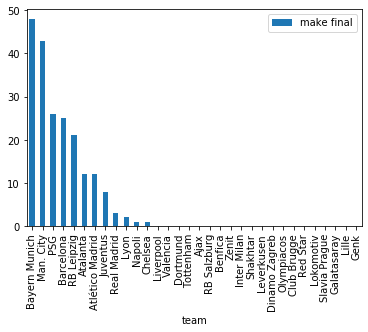

In [52]:
df_soccer.plot(kind='bar', x='team', y='make final');

## Summary

You saw how to scrape a website's tables and get them into a pandas DataFrame. 🎉

> Check for Understanding


- What does `pd.read_html()` return?
- When might you want to use `pd.read_html()`?

### Go forth and save time scraping tables with `pd.read_html()`! 🎺